# National School Data Analysis
###### Group B: Steven and Joshua


### Introduction
The level of education has been one of the most essential factor in the development of a country. This report therefore focus on analyzing the state of Indonesian's education system in each province within 5-10 years period and will attempt to discover the element for a school to be success. The objective of these findings is going to be valuable for schools and other education department to grow and further turns Indonesia into a more advance country.

The dataset that is used for this observation could be access from the following link:

1. **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan**: [https://dapo.dikdasmen.kemdikbud.go.id/sp](https://dapo.dikdasmen.kemdikbud.go.id/sp)

2. **Pusat Data dan Teknologi Informasi**: [http://statistik.data.kemdikbud.go.id/](http://statistik.data.kemdikbud.go.id/)

3. **Badan Pusat Statistik**: [https://www.bps.go.id/](https://www.bps.go.id/)

4. **UN Kemendikbud**: [https://puspendik.kemdikbud.go.id/hasil-un/](https://puspendik.kemdikbud.go.id/hasil-un/)

During the analysis, several questions are collected with the intention to stipulate the course of the analysis. The main questions this paper aims to answer are:
1. What is the state of Indonesian education within the past 5-10 years nationally.
2. How large is the discrepancy/inequality in Indonesian education.
3. What is the parameters that contribute the most to a school success. 

### Setting up the environment

In [1]:
#importing library
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

## 1. What is the state of Indonesian education within the past 5-10 years nationally

To find out the state of Indonesian education progressively, we want to find the trend of several indicator that could reveal how is the education in Indonesia. These indicators are:
1. Number of School
2. Student vs Teacher Ratio
3. School Participation Rate
4. Indonesian citizen education level (Illiterate and Information Technology)

### 1.1. Number of School

First, we simply want to analyze the growth of the number of school in Indonesia in general. There are 9 datasets that are downloaded from **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan** website. The datasets contain the number of school in each teaching semester from Semester 2015/2016 Genap until Semester 2019/2020 Genap. The dataset are grouped by the location(provice) and level(jenjang SD, SMP, SMA, SMK, SLB).

In [2]:
#Reading all the dataset and append it on df array
df_s = []
for i in range(1,10):
    names = "Desktop/dataset/data_sekolah/df" + str(i) + ".csv"
    df_s.append(pd.read_csv(names, sep=";", header=[0,1], index_col=0, skiprows=1))
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    df_s[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    
    repl_list = {r'\,':'', r'\.': '', 'Prov.':''}
    df_s[i-1]['Wilayah'] = df_s[i-1]['Wilayah']['Wilayah'].replace(repl_list, regex=True).str.strip().str.upper()
    temp = (df_s[i-1].iloc[:,1:]*1000).astype('int')
    temp[temp%1000==0] = temp[temp%1000==0]/1000 
    df_s[i-1] = pd.concat([df_s[i-1]['Wilayah'], temp], axis=1, join='inner')
    df_s[i-1] = df_s[i-1].set_index('Wilayah')
    
    df_s[i-1].columns = pd.MultiIndex.from_tuples(df_s[i-1].columns)
    

In [3]:
#Slicing the total of df_s
df_s_tl = []
sem = ["Genap", "Ganjil"]
tahun = 2015
semester = []
for i in range(8,-1,-1):
    df_s_tl.append(pd.DataFrame(df_s[i].loc['TOTAL']).unstack()['TOTAL'])
    semester.append(str(tahun) + "/" + str(tahun+1) + " " + sem[i%2])
    if sem[i%2] == sem[0]:
        tahun += 1
    
df_s_fin = pd.concat(df_s_tl, axis=1)
col_name = [semester,['Jml', 'N', 'S']]
df_s_fin.columns = pd.MultiIndex.from_product(col_name)

In [4]:
#Dividing the table into total, negeri and swasta
df_s_jml = df_s_fin.iloc[:,0::3]
df_s_n = df_s_fin.iloc[:,1::3]
df_s_s = df_s_fin.iloc[:,2::3]
df_s_jml.columns = semester
df_s_n.columns = semester
df_s_s.columns = semester

Text(0.5, 0.98, 'Jumlah Sekolah per Semester\n(Negeri vs Swasta)')

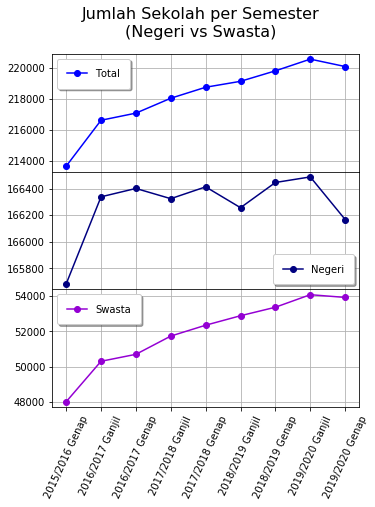

In [5]:
#Creating figure Negeri vs Swasta
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(semester, list(df_s_jml.T['Total']), label='Total', marker='o', color='b')
axs[1].plot(semester, list(df_s_n.T['Total']), label='Negeri', marker='o', color='navy')
axs[2].plot(semester, list(df_s_s.T['Total']), label='Swasta', marker='o', color='darkviolet')

for ax in axs.flat:
    ax.label_outer()
plt.xticks(df_s_jml.columns, semester, rotation='65')
fig.set_size_inches(5.5, 6.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0].grid()
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].grid()
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[2].grid()

fig.suptitle('Jumlah Sekolah per Semester\n(Negeri vs Swasta)', fontsize=16)

Text(0.5, 0.98, 'Jumlah Sekolah per Semester\n(per Jenjang)')

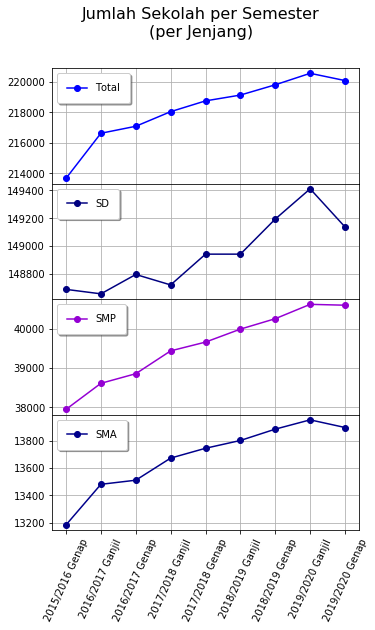

In [6]:
#Creating figure per Jenjang
fig, axs = plt.subplots(4, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(semester, list(df_s_jml.T['Total']), label='Total', marker='o', color='b')
axs[1].plot(semester, list(df_s_jml.T['SD']), label='SD', marker='o', color='navy')
axs[2].plot(semester, list(df_s_jml.T['SMP']), label='SMP', marker='o', color='darkviolet')
axs[3].plot(semester, list(df_s_jml.T['SMA']), label='SMA', marker='o', color='darkblue')

for ax in axs.flat:
    ax.label_outer()
plt.xticks(df_s_jml.columns, semester, rotation='65')
fig.set_size_inches(5.5, 8.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0].grid()
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].grid()
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[2].grid()
axs[3].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[3].grid()

fig.suptitle('Jumlah Sekolah per Semester\n(per Jenjang)', fontsize=16)

**RESULT**
- From observing the *total* number of school in Indonesia grow significantly on the 2015/16 semester genap, then having a stable growth before decreasing in the 2019/20 semester genap. 
- The number of *swasta* school growth is inline with the *total* growth, but the number of *negeri* school fluctuated throughout the year.
- While the number of *SD* school grow with slight fluctuation, the growth of *SMP* and *SMA* school are in lie with the *total* growth

The number of school in Indonesia, specifically all of the jenjang (SD, SMP, SMA) and type of school (Negeri, Swasta), increases throughout 9 semester.

### 1.2. Student vs Teacher Ratio

Next, we want to analyze the growth of student and teacher ratio throughout the year. From the same website, **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan**, 18 datasets are downloaded, which 9 of them contain the total number of student, while the other 9 of them contain the total number of teacher from the Semester 2015/2016 Genap until Semester 2019/2020 Genap. The dataset once again are grouped by the location(provice) and level(jenjang SD, SMP, SMA, SMK, SLB), and to answer the first question we again have our focus on the total number of teacher and student growth in Indonesia.

In [7]:
#Reading all the dataset (murid & guru) and append it to df array
df_m = []
df_g = []
for i in range(1,10):
    names_m = "Desktop/dataset/data_peserta_didik/df" + str(i) + ".csv"
    df_m.append(pd.read_csv(names_m, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    names_g = "Desktop/dataset/data_guru/df" + str(i) + ".csv"
    df_g.append(pd.read_csv(names_g, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    
    df_m[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    repl_list = {r'\,':'', r'\.': '', 'Prov.':''}
    df_m[i-1]['Wilayah'] = df_m[i-1]['Wilayah']['Wilayah'].replace(repl_list, regex=True).str.strip().str.upper()
    df_m[i-1].iloc[:,1:] = df_m[i-1].iloc[:,1:].replace({r'\.':''}, regex=True).astype(int)
    temp = (df_m[i-1].iloc[:,1:])
    df_m[i-1] = pd.concat([df_m[i-1]['Wilayah'], temp], axis=1, join='inner')
    df_m[i-1] = df_m[i-1].set_index('Wilayah')
    df_m[i-1].columns = pd.MultiIndex.from_tuples(df_m[i-1].columns)
    
    
    df_g[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    df_g[i-1]['Wilayah'] = df_g[i-1]['Wilayah']['Wilayah'].replace(repl_list, regex=True).str.strip().str.upper()
    df_g[i-1].iloc[:,1:] = df_g[i-1].iloc[:,1:].replace({r'\.':''}, regex=True).astype(int)
    temp = (df_g[i-1].iloc[:,1:])
    df_g[i-1] = pd.concat([df_g[i-1]['Wilayah'], temp], axis=1, join='inner')
    df_g[i-1] = df_g[i-1].set_index('Wilayah')
    df_g[i-1].columns = pd.MultiIndex.from_tuples(df_g[i-1].columns)

In [8]:
#Slicing the total of df_m and df_g
df_m_tl = []
df_g_tl = []
sem = ["Genap", "Ganjil"]
tahun = 2015
semester = []

for i in range(8,-1,-1):
    df_m_tl.append(pd.DataFrame(df_m[i].loc['TOTAL']).unstack()['TOTAL'])
    df_g_tl.append(pd.DataFrame(df_g[i].loc['TOTAL']).unstack()['TOTAL'])
    semester.append(str(tahun) + "/" + str(tahun+1) + " " + sem[i%2])
    if sem[i%2] == sem[0]:
        tahun += 1
    
df_m_fin = pd.concat(df_m_tl, axis=1)
df_g_fin = pd.concat(df_g_tl, axis=1)

col_name = [semester,['Jml', 'N', 'S']]
df_m_fin.columns = pd.MultiIndex.from_product(col_name)
df_g_fin.columns = pd.MultiIndex.from_product(col_name)

In [9]:
#Dividing the table into total
df_m_jml = df_m_fin.iloc[:,0::3]
df_m_jml.columns = semester

df_g_jml = df_g_fin.iloc[:,0::3]
df_g_jml.columns = semester

#Finding the ratio of murid vs guru
df_mg_jml = df_m_jml/df_g_jml

#Combining dataframe
df_mg_fin = pd.concat([df_m_jml.T['Total'], df_g_jml.T['Total'], df_mg_jml.T['Total']], axis=1, join='inner')
df_mg_fin.columns = ['Jml Murid', 'Jml Guru', 'Murid per Guru']
df_mg_fin

,Jml Murid,Jml Guru,Murid per Guru
2015/2016 Genap,44631066,2912170,15.325708
2016/2017 Ganjil,45318320,2946136,15.382291
2016/2017 Genap,45134357,2933290,15.386940
2017/2018 Ganjil,45388330,2748473,16.514017
2017/2018 Genap,45209158,2753425,16.419244
2018/2019 Ganjil,45037323,2755020,16.347367
2018/2019 Genap,44831625,2759324,16.247322
2019/2020 Ganjil,44761040,2732340,16.381944
2019/2020 Genap,44621547,2720778,16.400290


Text(0.5, 0.98, 'Jumlah Murid Per Guru')

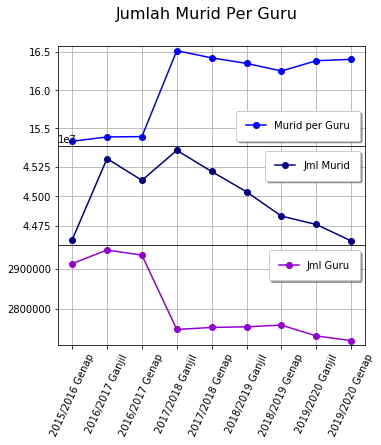

In [10]:
#Creating figure murid vs guru (negri vs swasta)
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(semester, list(df_mg_fin['Murid per Guru']), label='Murid per Guru', marker='o', color='b')
axs[1].plot(semester, list(df_mg_fin['Jml Murid']), label='Jml Murid', marker='o', color='navy')
axs[2].plot(semester, list(df_mg_fin['Jml Guru']), label='Jml Guru', marker='o', color='darkviolet')
for ax in axs.flat:
    ax.label_outer()
plt.xticks(df_s_jml.columns, semester, rotation='65')
fig.set_size_inches(5.5, 5.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0].grid()
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].grid()
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[2].grid()


fig.suptitle('Jumlah Murid Per Guru', fontsize=16)

**RESULT**

To determine the trend of teacher and student in Indonesia, we create a new column called `Jml Murid per Guru` which its value obtained from the total number of student per total number of teacher in a semester. This column indicate the rough number of class capacity in a certain semester.

- The number of *Jml Murid per Guru* is stay constant on about 15 Murid per Guru, before it experience a drastic increase in semester 2017/18 Ganjil to around 16 Murid per Guru, then it remain steady on that number on the rest of the semester.
- The occurence above happen because of there is a sudden drop on number of teacher on 2017/18 Ganjil, while the number of student decrease slowly.
- In total the number of *Jml Murid per Guru* still can be said to be constant as the average class capacity only increase by one student throughout 9 semesters.

### 1.3. School Participation Rate (APM)

As we can see from the previous analysis that the number of school in Indonesia increases throughout 9 semester. However, we presume that at the same time there is an increase in the number of population in Indonesia. So, we are interested to analyze the percentage of children who have access to the formal school education compare to who does not.

Angka Partisipasi Murni (APM) is an index indicating the percentage of student with a respective age that have an access to education compare to the total population of the same age. In this part we use APM value downloaded from the **Badan Pusat Statistik** website. The dataset consist of the APM percentage in 3 jenjang (SD, SMP, SMA) of each province from the year of 2011-2019

In [11]:
#Read and clean the apm data
df_apm = pd.read_csv("Desktop/dataset/apm.csv", header=[1,2], sep=";")
year = range(2011, 2020)
level = ["SD", "SMP", "SMA"]
col_name = [str(i) + "-" + j for i in year for j in level]
df_apm.columns = ["Provinsi"] + col_name
df_apm = df_apm.set_index("Provinsi")
df_apm = df_apm.replace("-", 0)
df_apm = df_apm.astype(float)

In [12]:
#Separate the df_apm into per jenjang
sd_col = [i for i in range(len(df_apm.columns)) if df_apm.columns[i].find("SD")!=-1]
smp_col = [i for i in range(len(df_apm.columns)) if df_apm.columns[i].find("SMP")!=-1]
sma_col = [i for i in range(len(df_apm.columns)) if df_apm.columns[i].find("SMA")!=-1]

df_apm_sd = df_apm.iloc[:, sd_col]
df_apm_smp = df_apm.iloc[:, smp_col]
df_apm_sma = df_apm.iloc[:, sma_col]

df_apm_sd.columns = year
df_apm_smp.columns = year
df_apm_sma.columns = year
df_apm_fin = pd.DataFrame(list(zip(df_apm_sd.loc['INDONESIA'], df_apm_smp.loc['INDONESIA'], df_apm_sma.loc['INDONESIA'])), 
               columns =['SD', 'SMP', 'SMA'])
df_apm_fin["Tahun"] = range(2011,2020)
df_apm_fin = df_apm_fin.set_index('Tahun')
df_apm_fin.T

Tahun,2011,2012,2013,2014,2015,2016,2017,2018,2019
SD,91.07,92.54,95.59,96.45,96.70,96.82,97.19,97.58,97.64
SMP,68.36,70.93,73.88,77.53,77.82,77.95,78.40,78.84,79.40
SMA,48.07,51.88,54.25,59.35,59.71,59.95,60.37,60.67,60.84


Text(0.5, 0.98, 'Angka Partisipasi Murni')

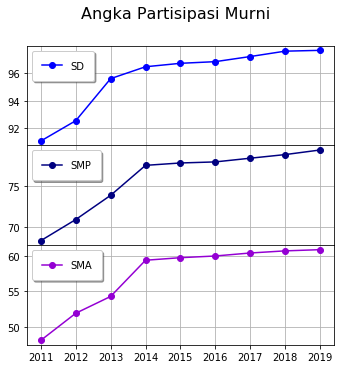

In [13]:
#Creating figure apm per jenjang
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(year, list(df_apm_fin['SD']), label='SD', marker='o', color='b')
axs[1].plot(year, list(df_apm_fin['SMP']), label='SMP', marker='o', color='navy')
axs[2].plot(year, list(df_apm_fin['SMA']), label='SMA', marker='o', color='darkviolet')
for ax in axs.flat:
    ax.label_outer()

fig.set_size_inches(5.5, 5.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0].grid()
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].grid()
axs[2].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[2].grid()


fig.suptitle('Angka Partisipasi Murni', fontsize=16)

**RESULT**

The School Participation Rate (Angka Partisipasi Murni) of every jenjang (SD, SMP, SMA) averagely increase every year, however, it's increasing rate has been decrease for the past 5 year.

### 1.4. Indonesian Citizen Education Level

Lastly, after analyzing the subject of Indonesian education (school building, teacher, student), we are interested in the trend of Indonesian citizen education level. The education level are determine from the proportion of illiterate citizen and the percentage of citizen with information and computer technology knowledge in the year of 2011-2019. The datasets are downloaded from **Badan Pusat Statistik** website. The data are grouped by the age category of `< 15`, `15-44` and `>= 44` year. For this observation we will only look at the `< 15` and `15-44`group as the group older than that does not really correspond to the condition of education gain from school over the past 10 years, as they have graduated before.

### 1.4.1. Illiterate (Buta Huruf) Citizen

In [14]:
#Read buta huruf percentage data
df_bh = pd.read_csv("Desktop/dataset/buta_huruf.csv", header=[1,2], sep=";")
year = range(2011, 2020)
level = ["< 15", "15-44", ">= 45"]
col_name = [str(i) + " " + j for i in year for j in level]
df_bh.columns = ["Provinsi"] + col_name
df_bh = df_bh.set_index("Provinsi")
df_bh = df_bh.replace("-", 0)
df_bh = df_bh.astype(float)

In [15]:
#Separate into several column
col_1 = [i for i in range(len(df_apm.columns)) if df_bh.columns[i].find("< 15")!=-1]
col_2 = [i for i in range(len(df_apm.columns)) if df_bh.columns[i].find("15-44")!=-1]

df_bh_1 = df_bh.iloc[:, col_1]
df_bh_2 = df_bh.iloc[:, col_2]

df_bh_1.columns = year
df_bh_2.columns = year
df_bh_fin = pd.DataFrame(list(zip(df_bh_1.loc['INDONESIA'], df_bh_2.loc['INDONESIA'])), 
               columns =['< 15', '15-44'])
df_bh_fin["Tahun"] = range(2011,2020)
df_bh_fin = df_bh_fin.set_index('Tahun')
df_bh_fin.T
#df_bh_1.loc["INDONESIA"]

Tahun,2011,2012,2013,2014,2015,2016,2017,2018,2019
< 15,7.56,7.03,6.08,4.88,4.78,4.62,4.50,4.34,4.10
15-44,2.31,2.03,1.61,1.24,1.10,1.00,0.94,0.86,0.76


Text(0.5, 0.98, 'Percentase Penduduk Buta Huruf')

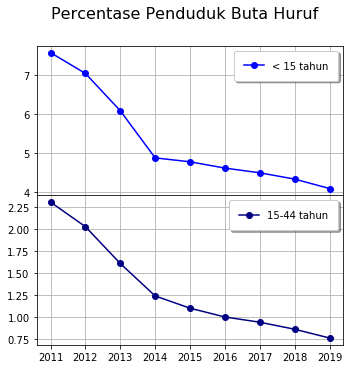

In [16]:
#Creating figure illiterate percentage
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(year, list(df_bh_fin['< 15']), label='< 15 tahun', marker='o', color='b')
axs[1].plot(year, list(df_bh_fin['15-44']), label='15-44 tahun', marker='o', color='navy')

for ax in axs.flat:
    ax.label_outer()

fig.set_size_inches(5.5, 5.5)

axs[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[0].grid()
axs[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
axs[1].grid()

fig.suptitle('Percentase Penduduk Buta Huruf', fontsize=16)

**RESULT**

The illiterate population percentage of both age group (< 15, 15-44) averagely decrease every year. The last survey in 2019 stated that there is only 4.1% of citizen under 15 years old could not read, while there is only 0.76% of 15-44 years old citizen.

### 1.4.2. Knowledge on Technology

The second indicator that determines the education level of Indonesian citizen is their knowledge on Technology. From **Badan Pusat Statistik website** a dataset showing the percentage of citizen from the age group of `15-24` with the knowledge on IT.

In [17]:
#Read the file
df_tik = pd.read_csv("Desktop/dataset/tik.csv", sep=";").dropna()
df_tik.columns = ["Provinsi", "2015", "2016", "2017", "2018", "2019"]
#repl_list = {',':'.', r'\.': '', r' ': ''}
df_tik["Provinsi"] = df_tik["Provinsi"].str.lstrip().str.upper()
df_tik = df_tik.set_index("Provinsi")
df_tik_fin = pd.DataFrame(df_tik.T.loc[:,"INDONESIA"])

In [18]:
df_tik_fin

,INDONESIA
2015,51.83
2016,58.21
2017,68.93
2018,77.05
2019,83.58


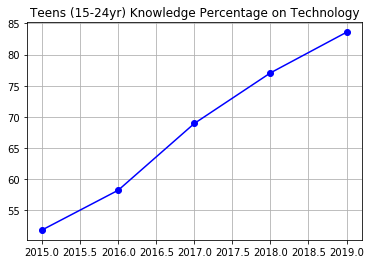

In [19]:
#Plotting the graph
fig, ax = plt.subplots()
y = df_tik.loc["INDONESIA"].values.reshape(-1, 1)
x = list(range(2015,2020))

ax.plot(x, y, marker='o', color='b')
ax.set_title('Teens (15-24yr) Knowledge Percentage on Technology')

ax.grid()

**RESULT**

There is a steady increase on the percentage of Indonesian teenager who have the understanding on technological field. There is only about 50% teenager who is capable in using technology 5 years ago, but now there is more than 80% who could.

## 2. How large is the discrepancy/inequality in Indonesian education

To analyze the first question we mainly focus on looking the trend during a certain time line. In this second question, to analyze the discrepancy of Indonesian education, we will observe a certain indicator per province. The indicator that is utilized is the same with the first questions, which are:
1. Number of School
2. Student vs Teacher Ratio
3. School Participation Rate
4. Indonesian citizen education level (Illiterate and Information Technology)

### 2.1. Number of School per Area

The same number of school in 2019 datasets are obtained from **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan** website. It is improper to directly compare the number of school per province, because some province have a larger area compare to the other which could affect the number of school in it. Therefore to manage this problem, a datasets containing the area of each province are obtained from **Badan Pusat Statistik** website.

In [20]:
#Read the luas wilayah data and take the latest year
df_lw = pd.read_csv("Desktop\dataset\data_luas_wilayah\luas_wilayah.csv", sep=";", header=[0,1], index_col=0, skiprows=3)
df_lw = df_lw['2016'].dropna()
repl_list = {',':'.', r'\.': '', r' ': ''}
df_lw["Luas 1"].replace(repl_list, regex=True, inplace=True)
df_lw["Luas 1"] = df_lw["Luas 1"].astype(int)
df_lw["Luas 1"] /= 100
df_lw.columns = ["Luas"]
df_lw.index = df_lw.index.str.upper()

#Combine luas wilayah and number of school dataset
df_s_lw = pd.concat([df_s[0]["Total"]['Jml'], df_lw], axis=1, join='outer').dropna()

#Creating Luas per Jml column
df_s_lw["Luas per Jml"] = df_s_lw['Luas']/df_s_lw['Jml']

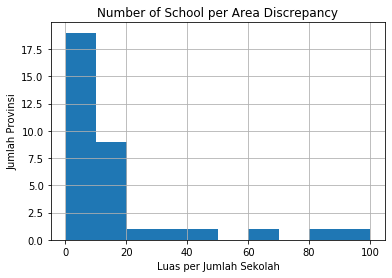

count     34.000000
mean      16.615669
std       23.592741
min        0.144413
25%        4.275769
50%        9.083515
75%       14.735035
max      100.089788
Name: Luas per Jml, dtype: float64

In [21]:
# Plot Histogram
data = df_s_lw["Luas per Jml"]
w = 10
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)
plt.grid()
plt.title('Number of School per Area Discrepancy')
plt.ylabel('Jumlah Provinsi')
plt.xlabel('Luas per Jumlah Sekolah')
plt.savefig('Desktop/figure6')
plt.show()
data.describe()

In [22]:
#Searching for Upper bound Outlier
sorted(df_s_lw["Luas per Jml"])
q1, q3= np.percentile(df_s_lw["Luas per Jml"],[25,75])
iqr = q3 - q1
upper_bound = q3 +(1.5 * iqr)
lower_bound = q1 -(1.5 * iqr) 

print('upper bound outlier: ', upper_bound)
print('lower bound outlier: ', lower_bound)

#The province which is in the outlier
df_s_lw[df_s_lw["Luas per Jml"] > upper_bound].sort_values(["Luas per Jml"], ascending=False)

upper bound outlier:  30.423935329720678
lower bound outlier:  -11.413131326259832


,Jml,Luas,Luas per Jml
KALIMANTAN UTARA,754.0,75467.70,100.089788
PAPUA,3687.0,319036.05,86.529984
PAPUA BARAT,1567.0,99671.63,63.606656
KALIMANTAN TIMUR,3030.0,129066.64,42.596251
KALIMANTAN TENGAH,3868.0,153564.50,39.701267


In [23]:
#Searching for the top smallest Luas per Jml
df_s_lw.sort_values(["Luas per Jml"]).head()

,Jml,Luas,Luas per Jml
DKI JAKARTA,4598.0,664.01,0.144413
DI YOGYAKARTA,2748.0,3133.15,1.140156
JAWA BARAT,30120.0,35377.76,1.174560
BANTEN,7557.0,9662.92,1.278671
JAWA TENGAH,24925.0,32800.69,1.315976


**Result**

The `Luas per Jml` column indicate the average area of a school cover in a province which also means a province with a lower value has a better access to education. From the histogram, most of the province in Indonesia averagely have a school within less than 20 km square. 

The provinces with a better school access are generally located in the west and central part of Java island. Meanwhile, the capital of Indonesia, DKI Jakarta has an extremely low value (10 times lower than other neighbour province) that means there is a school in every 0.1 km square in Jakarta.

However, there are some school with `Luas per Jml` that are significantly higher than the rest. Those school that fall into the upper bound outlier are located in Kalimantan and Papua island.

### 2.2. Student vs Teacher Ratio

The same number of student and teacher in 2019 datasets are obtained from **Direktorat Jenderal Pendidikan Anak Usia Dini, Pendidikan Dasar dan Pendidikan Menengah Kementerian Pendidikan dan Kebudayaan** website. Again this time, we will compare its ratio per province

In [24]:
#Take the latest number of student and teacher data and do some fixing

df_mg = pd.concat([df_m[0]['Total'], df_g[0]['Total']], axis=1, join='inner')
df_mg.columns = ["Jml Murid", "Murid N", "Murid S", "Jml Guru", "Guru N", "Guru S"]
df_mg["Guru N"] *= 1000
df_mg["Jml Murid"] = df_mg["Murid N"] + df_mg["Murid S"]
df_mg["Jml Guru"] = df_mg["Guru N"] + df_mg["Guru S"]
df_mg["Murid per Guru"] = df_mg['Jml Murid']/df_mg['Jml Guru']
df_mg = df_mg.iloc[:,[0,3,6]]

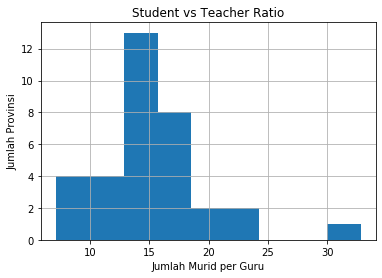

count    34.000000
mean     14.990983
std       4.792716
min       7.153312
25%      13.058702
50%      14.179980
75%      16.916316
max      32.786457
Name: Murid per Guru, dtype: float64

In [25]:
# Plot Histogram
data = df_mg["Murid per Guru"].drop(["TOTAL", "LUAR NEGERI"])
w = 3
n = math.ceil((data.max() - data.min())/w)
ax = plt.hist(data, bins = n)
plt.grid()
plt.title("Student vs Teacher Ratio")
plt.ylabel("Jumlah Provinsi")
plt.xlabel('Jumlah Murid per Guru')
plt.savefig("Desktop/figure7")
plt.show()
data.describe()

In [37]:
# Finding outlier
data = df_mg["Murid per Guru"].drop(["TOTAL", "LUAR NEGERI"])
iqr = data.describe()[6] - data.describe()[4]
lower_bound = data.describe()[4] -(1.5 * iqr) 
upper_bound = data.describe()[6] +(1.5 * iqr)

print('upper bound outlier: ', upper_bound)
print('lower bound outlier: ', lower_bound)

pd.DataFrame(data[data > upper_bound])
pd.DataFrame(data[data < lower_bound])

upper bound outlier:  22.702736337664824
lower bound outlier:  7.272281945152911


,Murid per Guru
Wilayah,
SULAWESI TENGAH,7.153312


In [27]:
#Insight from previous analysis
df_mg.loc[['DKI JAKARTA', 'DI YOGYAKARTA', 'JAWA BARAT', 'BANTEN', 'JAWA TENGAH', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 'PAPUA', 'PAPUA BARAT', 'KALIMANTAN UTARA']].sort_values('Murid per Guru')

,Jml Murid,Jml Guru,Murid per Guru
Wilayah,,,
KALIMANTAN TIMUR,385507,43076,8.949461
KALIMANTAN TENGAH,481758,38891,12.387390
KALIMANTAN UTARA,136622,10052,13.591524
DI YOGYAKARTA,568298,39241,14.482251
PAPUA BARAT,219673,13161,16.691209
JAWA TENGAH,5140654,294928,17.430200
DKI JAKARTA,1557840,80267,19.408225
PAPUA,641470,30342,21.141322
JAWA BARAT,8011091,373947,21.423065


**RESULT**

From the observation, we found out that the average ratio of student every one teacher in 2019 is 14.7 and there is only one upper bound outlier which is Sulawesi Tenggara and a lower bound outlier which is Sulawesi Tengah. From this we can assume that there is a discrepancy in the class capacity between Sulawesi Province alone

Another insight we obtain is that, while provinces in Kalimantan is considered as having lack access to school (from observation 2.1.), its Student vs Ratio is lower than the mean, meaning there is no lack of teacher in Kalimantan. On the other hand, the provinces in Java and Papua island have this value higher than the mean.

### 2.3. School Participation Rate (APM)

Next we will observe the APM percentage per jenjang (SD, SMP, SMA) and will analayze how will each province perform

In [46]:
#Create a new total column and find its summarry
df_apm_c = pd.concat([df_apm_sd[2019], df_apm_smp[2019], df_apm_sma[2019]], axis=1, join = 'outer')
df_apm_c.columns = ['SD', 'SMP', 'SMA']
df_apm_c['Total'] = df_apm_c['SD'] + df_apm_c['SMP'] + df_apm_c['SMA']
df_apm_c.describe()

,SD,SMP,SMA,Total
count,35.000000,35.000000,35.000000,35.000000
mean,96.986571,77.375714,61.890000,236.252286
std,3.509468,6.112178,6.055583,13.841468
min,79.190000,57.190000,44.320000,180.700000
25%,96.950000,74.490000,58.605000,231.560000
50%,97.910000,78.420000,61.770000,237.240000
75%,98.665000,80.840000,65.085000,242.800000
max,99.530000,86.750000,73.010000,257.640000


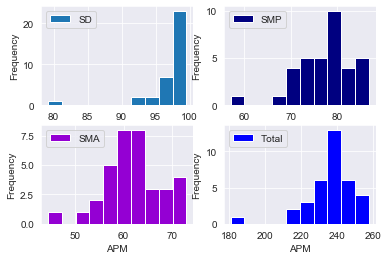

In [68]:
#Plotting the graph

fig, axes = plt.subplots(2,2)
ax0, ax1, ax2, ax3 = axes.flatten()


ax0.hist(df_apm_c['SD'], histtype='bar', label='SD')
ax0.legend(prop={'size': 10})
#ax0.set_title('SD')
ax0.set_xlabel('APM')
ax0.set_ylabel('Frequency')

ax1.hist(df_apm_c['SMP'], histtype='bar', color='navy', label='SMP')
ax1.legend(prop={'size': 10})
#ax1.set_title('SMP')
ax1.set_xlabel('APM')
ax1.set_ylabel('Frequency')

ax2.hist(df_apm_c['SMA'], histtype='bar', color='darkviolet', label='SMA')
ax2.legend(prop={'size': 10})
#ax2.set_title('SMA')
ax2.set_xlabel('APM')
ax2.set_ylabel('Frequency')

ax3.hist(df_apm_c['Total'], histtype='bar', color='b', label='Total')
ax3.legend(prop={'size': 10})
#ax3.set_title('Total')
ax3.set_xlabel('APM')
ax3.set_ylabel('Frequency')

plt.show()

In [73]:
# Finding outlier
data = df_apm_c["Total"]
iqr = data.describe()[6] - data.describe()[4]
lower_bound = data.describe()[4] -(1.5 * iqr) 
upper_bound = data.describe()[6] +(1.5 * iqr)

print('upper bound outlier: ', upper_bound)
print('lower bound outlier: ', lower_bound)

pd.DataFrame(df_apm_c[data > upper_bound])
pd.DataFrame(df_apm_c[data < lower_bound])

upper bound outlier:  259.66
lower bound outlier:  214.7


,SD,SMP,SMA,Total
Provinsi,,,,
PAPUA,79.19,57.19,44.32,180.7


In [75]:
#Finding the other lowest apm
df_apm_c.sort_values('Total').head()

,SD,SMP,SMA,Total
Provinsi,,,,
PAPUA,79.19,57.19,44.32,180.70
KALIMANTAN BARAT,97.09,66.67,51.21,214.97
NUSA TENGGARA TIMUR,96.16,69.19,53.68,219.03
SULAWESI BARAT,95.86,69.36,57.64,222.86
GORONTALO,98.41,70.28,57.52,226.21


In [76]:
#Finding the highest apm
df_apm_c.sort_values('Total', ascending=False).head()

,SD,SMP,SMA,Total
Provinsi,,,,
KEP. RIAU,99.13,85.54,72.97,257.64
BALI,96.81,86.75,73.01,256.57
ACEH,99.12,86.48,70.35,255.95
DI YOGYAKARTA,99.53,84.04,70.49,254.06
NUSA TENGGARA BARAT,98.87,83.92,66.04,248.83


**RESULT**

From the observation, again Papua Province shown a low total score on the APM which is even a lot more smaller in number rather than it second worse. Most of the Kalimantan Province (except Kalimantan Timur) also has a low APM percentage. Since Kalimantan Timur has the best number of student against teacher ratio and also a high APM percentage, we deduce that there is a discrepancy in the education throughout Kalimantan island.

Meanwhile, the province who has the highest total APM percentage are Kepulauan Riau, Bali, and some other province who have relatively smaller area. However, even though NTB has a high APM percentage, NTT has the lowest. 

### 2.4. Education Level

### 2.4.1. Illiterate Citizen Percentage

In [95]:
#Setting the dataset
df_bh_c = pd.concat([df_bh_1[2019], df_bh_2[2019]], axis=1, join='outer')
df_bh_c.columns = ['< 15', '15-44']
df_bh_c.describe()

,< 15,15-44
count,35.000000,35.000000
mean,3.690000,1.162286
std,4.248179,3.390927
min,0.200000,0.050000
25%,1.105000,0.120000
50%,1.910000,0.230000
75%,5.280000,0.845000
max,22.000000,20.210000


Text(0.5, 0, 'Percentase Buta Huruf')

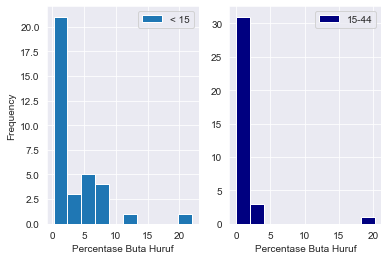

In [97]:
#Plot Histogram
fig, axes = plt.subplots(1,2)
ax0, ax1 = axes.flatten()

ax0.hist(df_bh_c['< 15'], histtype='bar', label='< 15')
ax0.legend(prop={'size': 10})
ax0.set_xlabel('Percentase Buta Huruf')
ax0.set_ylabel('Frequency')

ax1.hist(df_bh_c['15-44'], histtype='bar', color='navy', label='15-44')
ax1.legend(prop={'size': 10})
ax1.set_xlabel('Percentase Buta Huruf')
#ax1.set_ylabel('Frequency')

In [110]:
# Finding outlier
data=df_bh_c['< 15']
iqr = data.describe()[6] - data.describe()[4]
lower_bound = data.describe()[4] -(1.5 * iqr) 
upper_bound = data.describe()[6] +(1.5 * iqr)
df_bh_o1 = pd.DataFrame(data[data > upper_bound])

data=df_bh_c['15-44']
iqr = data.describe()[6] - data.describe()[4]
lower_bound = data.describe()[4] -(1.5 * iqr) 
upper_bound = data.describe()[6] +(1.5 * iqr)
df_bh_o2 = pd.DataFrame(data[data > upper_bound])

df_bh_ol = pd.concat([df_bh_o1, df_bh_o2], axis=1, join='outer')
df_bh_ol.sort_values('< 15', ascending=False)

,< 15,15-44
PAPUA,22.00,20.21
NUSA TENGGARA BARAT,12.41,2.46
NUSA TENGGARA TIMUR,NaN,2.51
SULAWESI BARAT,NaN,2.31


**RESULT**

From the observation, both Papua and NTB Province have a very high percentage of illiterate citizen in both age category (< 15 and 15-44) as they both become an outlier. Meanwhile, NTT and Sulawesi Barat Province also included to be an outlier for the 15-44 years category.

### 2.4.2. Knowledge on Technology

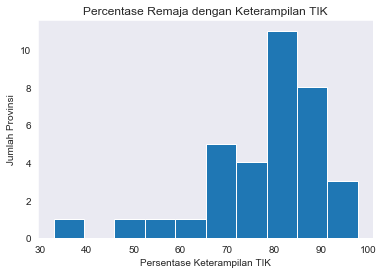

count    35.000000
mean     78.397143
std      13.569783
min      32.880000
25%      73.710000
50%      81.220000
75%      87.575000
max      97.910000
Name: 2019, dtype: float64

In [112]:
# Plot Histogram
data = df_tik['2019']
ax = plt.hist(data)
plt.grid()
plt.title("Percentase Remaja dengan Keterampilan TIK")
plt.ylabel("Jumlah Provinsi")
plt.xlabel('Persentase Keterampilan TIK')
plt.savefig("Desktop/figure11")
plt.show()

df_tik['2019'].describe()

In [114]:
# Finding Outlier
iqr = df_tik["2019"].describe()[6] - df_tik["2019"].describe()[4]
lower_bound = df_tik["2019"].describe()[4] -(1.5 * iqr) 
upper_bound = df_tik["2019"].describe()[6] +(1.5 * iqr)
df_tik[df_tik["2019"] < lower_bound].sort_values('2019')
#df_tik[df_tik["2019"] > upper_bound]

,2015,2016,2017,2018,2019
Provinsi,,,,,
PAPUA,17.03,23.09,30.42,33.48,32.88
NUSA TENGGARA TIMUR,22.49,29.12,38.68,43.32,51.03
MALUKU UTARA,27.15,30.15,35.19,49.32,52.88


In [117]:
df_tik.sort_values('2019', ascending=False).head()

,2015,2016,2017,2018,2019
Provinsi,,,,,
DI YOGYAKARTA,83.22,85.43,92.19,95.48,97.91
DKI JAKARTA,80.01,82.53,89.93,92.15,95.41
KEP. RIAU,68.63,76.60,84.48,86.37,93.05
BALI,66.63,76.42,81.45,87.56,91.40
JAWA TENGAH,55.99,63.63,75.51,83.33,90.93


**RESULT**

From the observation, the teenagers in Papua, NTT and Maluku Utara province has a low knowledge on technology. There are even only 33% of teenager in Papua adopt technology on their daily life compare to the top percentage user of technology such as Yogyakarta and Jakarta who have more than 95%, the number is incredibly low. 

## 3. What is the parameters that contribute the most to a school success (SMA)

### Success School Measurement

In this analysis, we measure a school suceedity by its Ujian National Score. We believe that if a province achieve a higher average UN score, the school in that province are more successful. Therefore we extract the average UN score in each province from (https://puspendik.kemdikbud.go.id/hasil-un/)[https://puspendik.kemdikbud.go.id/hasil-un/].

In [118]:
# Read and clean un score per province data
df_un = pd.read_csv("Desktop/dataset/data_un/nilai_un_sma.csv",sep=";", header = [0,1], index_col=1, skiprows=3).iloc[:,1:-1]
df_un.columns = ["Provinsi", "Jumlah Satuan Pendidikan", "Jumlah Peserta", "B Indonesia", "B Inggris", "Matematika", "Fisika", "Kimia", "Biologi", "Rerata Nilai"]
#repl_list = {r'\,': '.'}
#df_un["Rerata Nilai"].replace(repl_list, regex=True, inplace=True)
#df_un["Rerata Nilai"] = df_un["Rerata Nilai"].astype(float)

df_un.at[28, 'Provinsi'] = "KEPULAUAN BANGKA BELITUNG"
df_un = df_un.set_index("Provinsi") 
pd.DataFrame(df_un["Rerata Nilai"].head())

,Rerata Nilai
Provinsi,
DKI JAKARTA,66.90
JAWA BARAT,53.54
JAWA TENGAH,59.32
DI YOGYAKARTA,65.35
JAWA TIMUR,56.28


As we can see, the province who achieve the highest UN score are all located in the Java island. Therefore, we can assume the school in that province are averagely more successful than other school located in other province.

Next we are going to compare several parameters that may have the correlation with the UN score. Hopefully, we found a certain indicators that could determine the success of the school. The parameters that we are interested to find are:
- Ijazah Tertinggi Guru
- Masa Kerja Guru
- School Resources Condition (Laboratorium IPA, Perpustakaan, Ruang Kelas and Usaha Kesehatan)
- Technological Knowledge

**Correlation Coefficient**

In the following analysis we will calculate the Pearson Correlation coefficient of Nilai UN and each of the parameter. This Coefficient will determine how strong they are correlated. The coefficient range will be between -1 until 1, which negative value means they are negatively correlated and positive value means they are positively correlated. The strength of the correlation will be as follow:
- 0:       No correlation
- 0-0.5:   Weak correlation
- 0.5-0.8: Moderate correlation
- 0.8-1:   Strong correlation

### 3.1. UN Score vs Ijazah Tertinggi Guru

In [119]:
#IJAZAH TERTINGGI GURU
df_itg = pd.read_csv("Desktop/dataset/data_resource/ijazah_tertinggi_guru.csv").iloc[2:,[0,5,6,7]].dropna(how="all")
df_itg.columns = ["Provinsi", "< SMA", ">= SMA", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_itg["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_itg["Provinsi"] = df_itg["Provinsi"].str.lstrip().str.upper()
df_itg.replace({r'\,':''}, regex=True, inplace=True)
df_itg[["< SMA", ">= SMA", "Total"]]=df_itg[["< SMA", ">= SMA", "Total"]].astype(int)
df_itg=df_itg.reset_index().iloc[:,1:]
df_itg.set_index("Provinsi", inplace=True)

In [120]:
#Percentage of teacher with higher education (>=SMA)
df_itg["Percentase"] = df_itg[">= SMA"] / df_itg["Total"]
df_itg.head()

,< SMA,>= SMA,Total,Percentase
Provinsi,,,,
DKI JAKARTA,306,1883,2189,0.860210
JAWA BARAT,1192,6724,7916,0.849419
JAWA TENGAH,481,5134,5615,0.914337
DI YOGYAKARTA,127,915,1042,0.878119
JAWA TIMUR,780,5496,6276,0.875717


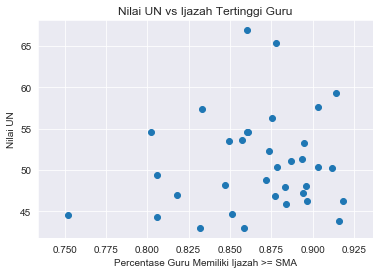

In [121]:
#Combine IJAZAH TERTINGGI GURU and UN SCORE
df_un_itg = pd.concat([df_un["Rerata Nilai"], df_itg["Percentase"]], axis=1, join="inner")
plt.scatter(df_itg["Percentase"], df_un["Rerata Nilai"])
plt.title("Nilai UN vs Ijazah Tertinggi Guru")
plt.xlabel("Percentase Guru Memiliki Ijazah >= SMA")
plt.ylabel("Nilai UN")
plt.savefig("Desktop/figure12")
plt.show()

In [123]:
#Find Pearson correlation
df_un_itg.corr(method='pearson')

,Rerata Nilai,Percentase
Rerata Nilai,1.000000,0.102152
Percentase,0.102152,1.000000


**RESULT**

After calculating the Pearson Correlation Coefficient of Nilai UN and the teacher's capability, we discover that their coefficient is 0.1 which mean they are **Weakly Correlated**

### 3.2. UN Score vs Masa Kerja Guru

In [124]:
#MASA KERJA GURU
df_mkg = pd.read_csv("Desktop/dataset/data_resource/masa_kerja_guru.csv").iloc[:,[1,2,4,6,8,10,12,14]].dropna(how='all')
df_mkg.columns = ["Provinsi", "<=4", "5-9", "10-14", "15-19", "20-24", ">=25", "Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_mkg["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_mkg["Provinsi"] = df_mkg["Provinsi"].str.lstrip().str.upper()
df_mkg.replace({r'\,':''}, regex=True, inplace=True)
#df_mkg.iloc[:,1:]=df_mkg.iloc[:,1:].astype(int)
df_mkg.dropna()
df_mkg.set_index("Provinsi", inplace=True)
df_mkg=df_mkg.astype(int)
#df_mkg.dtypes

In [125]:
#Find mean (expectation) of Teachers' teaching experience in each province
year = [2,7,12,17,22,27]
df_mkg["Rerata Pengalaman"] = 0

for i in range(0,len(year)):
    df_mkg["Rerata Pengalaman"] += year[i] * df_mkg[df_mkg.columns[i]]

df_mkg["Rerata Pengalaman"] /= df_mkg["Total"]
df_mkg.sort_values("Rerata Pengalaman").head()

,<=4,5-9,10-14,15-19,20-24,>=25,Total,Rerata Pengalaman
Provinsi,,,,,,,,
DKI JAKARTA,6517,2085,817,650,384,681,8701,8.656246
PAPUA,1988,1184,585,267,110,130,3316,8.972557
MALUKU UTARA,1419,951,500,173,109,97,2527,9.280966
KALIMANTAN BARAT,3291,1947,1195,397,141,259,5464,9.406113
NUSA TENGGARA TIMUR,5683,4666,1835,753,304,336,10008,9.453337


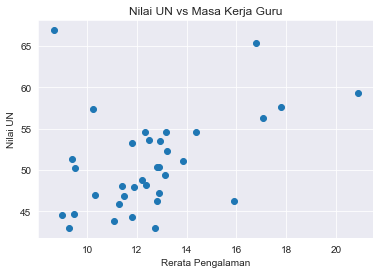

In [126]:
#Combine MASA KERJA GURU and UN SCORE
df_un_mkg = pd.concat([df_un["Rerata Nilai"], df_mkg["Rerata Pengalaman"]], axis=1, join="inner")
plt.scatter(df_mkg["Rerata Pengalaman"], df_un["Rerata Nilai"])
plt.title("Nilai UN vs Masa Kerja Guru")
plt.xlabel("Rerata Pengalaman")
plt.ylabel("Nilai UN")
plt.savefig("Desktop/figure13")
plt.show()

In [127]:
#Find Pearson correlation
df_un_mkg.corr(method='pearson')

,Rerata Nilai,Rerata Pengalaman
Rerata Nilai,1.000000,0.389838
Rerata Pengalaman,0.389838,1.000000


**RESULT**

After calculating the Pearson Correlation Coefficient of Nilai UN and the teacher's teaching experience, we discover that their coefficient is around 0.4 which mean they are **Weakly Correlated**

### 3.3. UN Score vs Resources

In [128]:
#KONDISI LABORATORIUM IPA
df_kli = pd.read_csv("Desktop/dataset/data_resource/kondisi_laboratorium_ipa.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_kli.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_kli["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_kli["Provinsi"] = df_kli["Provinsi"].str.lstrip().str.upper()
df_kli.replace({r'\,':''}, regex=True, inplace=True)
df_kli[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_kli[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_kli.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_kli["Persentase KLI"] = df_kli["Baik"] / df_kli["Jumlah Total"]
df_kli.sort_values("Persentase KLI", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KLI
Provinsi,,,,,,,
DKI JAKARTA,697,607,10,1,0,1315,0.530038
KEPULAUAN RIAU,109,124,12,6,0,251,0.434263
BALI,135,180,7,9,0,331,0.407855
BANTEN,364,454,44,36,0,898,0.405345
KALIMANTAN SELATAN,132,202,8,6,0,348,0.379310


In [129]:
#KONDISI PERPUSTAKAAN
df_kp = pd.read_csv("Desktop/dataset/data_resource/kondisi_perpustakaan.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_kp.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_kp["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_kp["Provinsi"] = df_kp["Provinsi"].str.lstrip().str.upper()
df_kp.replace({r'\,':''}, regex=True, inplace=True)
df_kp[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_kp[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_kp.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_kp["Persentase KP"] = df_kp["Baik"] / df_kp["Jumlah Total"]
df_kp.sort_values("Persentase KP", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KP
Provinsi,,,,,,,
DKI JAKARTA,239,244,7,2,0,492,0.485772
KEPULAUAN RIAU,63,70,3,1,0,137,0.459854
KALIMANTAN SELATAN,75,111,2,9,0,197,0.380711
BALI,60,94,3,1,0,158,0.379747
KALIMANTAN TIMUR,73,131,5,5,0,214,0.341121


In [130]:
#KONDISI RUANG KELAS
df_krk = pd.read_csv("Desktop/dataset/data_resource/kondisi_ruang_kelas.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_krk.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_krk["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_krk["Provinsi"] = df_krk["Provinsi"].str.lstrip().str.upper()
df_krk.replace({r'\,':''}, regex=True, inplace=True)
df_krk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_krk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_krk.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_krk["Persentase KRK"] = df_krk["Baik"] / df_krk["Jumlah Total"]
df_krk.sort_values("Persentase KRK", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KRK
Provinsi,,,,,,,
DKI JAKARTA,3286,3116,53,0,0,6455,0.509063
BALI,1080,1673,35,10,0,2798,0.385990
KEPULAUAN RIAU,616,937,69,16,0,1638,0.376068
KEPULAUAN BANGKA BELITUNG,350,540,34,39,0,963,0.363448
KALIMANTAN SELATAN,871,1501,59,15,0,2446,0.356092


In [131]:
#KONDISI USAHA KESEHATAN
df_kuk = pd.read_csv("Desktop/dataset/data_resource/kondisi_usaha_kesehatan.csv").iloc[:,[0,3,5,7,9,11,13]].dropna(how='all')
df_kuk.columns = ["Provinsi", "Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]
repl_list = {'\d+':'', r'\,': '.', r'Prov.':'', r'\.':''}
df_kuk["Provinsi"].replace(repl_list, regex=True, inplace=True)
df_kuk["Provinsi"] = df_kuk["Provinsi"].str.lstrip().str.upper()
df_kuk.replace({r'\,':''}, regex=True, inplace=True)
df_kuk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]]=df_kuk[["Baik", "Rusak Ringan", "Rusak Sedang", "Rusak Berat", "Rusak Total", "Jumlah Total"]].astype(int)
df_kuk.set_index("Provinsi", inplace=True)

#Find the percentage of Good resource
df_kuk["Persentase KUK"] = df_kuk["Baik"] / df_kuk["Jumlah Total"]
df_kuk.sort_values("Persentase KUK", ascending=False).head()

,Baik,Rusak Ringan,Rusak Sedang,Rusak Berat,Rusak Total,Jumlah Total,Persentase KUK
Provinsi,,,,,,,
DKI JAKARTA,220,200,3,0,0,423,0.520095
KEPULAUAN RIAU,34,37,7,0,0,78,0.435897
BALI,51,64,3,2,0,120,0.425000
KALIMANTAN SELATAN,49,70,0,2,0,121,0.404959
BANTEN,116,173,11,8,0,308,0.376623


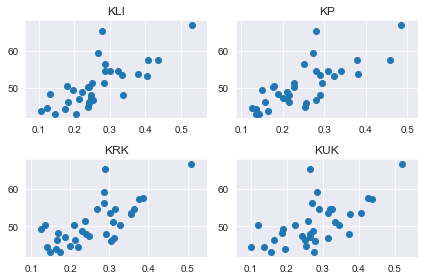

In [133]:
#Combine RESOURCES and UN SCORE
df_un_res = pd.concat([df_un["Rerata Nilai"], df_kli["Persentase KLI"], df_kp["Persentase KP"], df_krk["Persentase KRK"], df_kuk["Persentase KUK"]], axis=1, join="inner")
#df_un_res
plt.subplot(2,2,1)
plt.scatter(df_un_res["Persentase KLI"], df_un_res["Rerata Nilai"])
plt.title("KLI")

plt.subplot(2,2,2)
plt.scatter(df_un_res["Persentase KP"], df_un_res["Rerata Nilai"])
plt.title("KP")

plt.subplot(2,2,3)
plt.scatter(df_un_res["Persentase KRK"], df_un_res["Rerata Nilai"])
plt.title("KRK")

plt.subplot(2,2,4)
plt.scatter(df_un_res["Persentase KUK"], df_un_res["Rerata Nilai"])
plt.title("KUK")


plt.tight_layout()
plt.savefig("Desktop/figure14")
plt.show()

In [134]:
#Find Pearson correlation
df_un_res.corr(method='pearson')

,Rerata Nilai,Persentase KLI,Persentase KP,Persentase KRK,Persentase KUK
Rerata Nilai,1.000000,0.740607,0.751989,0.723639,0.625695
Persentase KLI,0.740607,1.000000,0.933758,0.907700,0.922214
Persentase KP,0.751989,0.933758,1.000000,0.914517,0.911752
Persentase KRK,0.723639,0.907700,0.914517,1.000000,0.914930
Persentase KUK,0.625695,0.922214,0.911752,0.914930,1.000000


**RESULT**

After calculating the Pearson Correlation Coefficient of Nilai UN and the condition of school resources, we discover that their coefficient is around 0.7 which mean they are **Moderately Correlated**

### UN Score vs Technology

In [164]:
#Preparing the data
df_tik = pd.read_csv("Desktop/dataset/keterampilan_tik.csv", sep=";").dropna()
df_tik.columns = ["Provinsi", "2015", "2016", "2017", "2018", "2019"]
#repl_list = {',':'.', r'\.': '', r' ': ''}
df_tik["Provinsi"].str.lstrip()

df_tik["Provinsi"].replace({r'KEP.':'KEPULAUAN'}, regex=True, inplace=True)
df_tik = df_tik.set_index("Provinsi")
#pd.DataFrame(df_tik.sort_values('2019', ascending=False)["2019"].head(10))

x = pd.DataFrame(df_tik.sort_values('2019', ascending=False).drop("INDONESIA")["2019"])
x.columns = ["Kemampuan TIK"]
df_tik["2019"]
df_un_tik = pd.concat([df_un["Rerata Nilai"], x], axis=1, join="inner")
df_un_tik.head()

,Rerata Nilai,Kemampuan TIK
Provinsi,,
DKI JAKARTA,66.90,85.17
JAWA BARAT,53.54,65.37
JAWA TENGAH,59.32,58.75
DI YOGYAKARTA,65.35,75.04
JAWA TIMUR,56.28,57.23


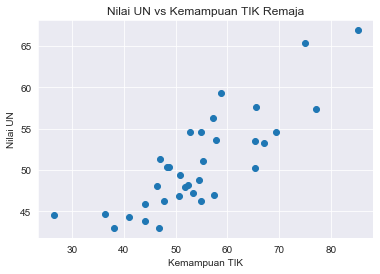

In [162]:
plt.scatter(df_un_tik["Kemampuan TIK"], df_un_tik["Rerata Nilai"])
plt.title("Nilai UN vs Kemampuan TIK Remaja")
plt.xlabel("Kemampuan TIK")
plt.ylabel("Nilai UN")
plt.show()

In [163]:
df_un_tik.corr(method='pearson')

,Rerata Nilai,Kemampuan TIK
Rerata Nilai,1.000000,0.828873
Kemampuan TIK,0.828873,1.000000


**RESULT**

After calculating the Pearson Correlation Coefficient of Nilai UN and the teenagers knowledge on technology percentage, we discover that their coefficient is around 0.8 which mean they are **Strongly Correlated**